In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, plot_confusion_matrix
from patsy import dmatrices
from imblearn.over_sampling import RandomOverSampler
import warnings
sns.set()
warnings.filterwarnings("ignore")

In [110]:
df_data = sm.datasets.fair.load_pandas().data
df_data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [111]:
df_data.isna().sum()

rate_marriage      0
age                0
yrs_married        0
children           0
religious          0
educ               0
occupation         0
occupation_husb    0
affairs            0
dtype: int64

In [112]:
df_data.shape

(6366, 9)

In [165]:
df_data['affairs'] = (df_data.affairs > 0).astype(int)
df_data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1


In [166]:
df_data.iloc[np.where(df_data['affairs'] == 0)].head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
2053,4.0,32.0,9.0,2.0,3.0,14.0,2.0,4.0,0
2054,4.0,27.0,6.0,0.0,2.0,14.0,3.0,4.0,0
2055,4.0,22.0,2.5,0.0,2.0,14.0,3.0,2.0,0
2056,5.0,42.0,23.0,4.0,3.0,16.0,3.0,5.0,0
2057,5.0,27.0,2.5,1.0,3.0,20.0,2.0,2.0,0


In [167]:
df_data.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.322495
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,0.467468
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,1.000000
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,1.000000


In [168]:
y, X = dmatrices('affairs ~ rate_marriage + age + yrs_married + children + religious + educ + C(occupation) + C(occupation_husb)',
                 df_data,
                 return_type="dataframe")

In [169]:
X.head(10)

,Intercept,C(occupation)[T.2.0],C(occupation)[T.3.0],C(occupation)[T.4.0],C(occupation)[T.5.0],C(occupation)[T.6.0],C(occupation_husb)[T.2.0],C(occupation_husb)[T.3.0],C(occupation_husb)[T.4.0],C(occupation_husb)[T.5.0],C(occupation_husb)[T.6.0],rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0
5,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,27.0,9.0,0.0,2.0,14.0
6,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,37.0,23.0,5.5,2.0,12.0
7,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,37.0,23.0,5.5,2.0,12.0
8,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,22.0,2.5,0.0,2.0,12.0
9,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,27.0,6.0,0.0,1.0,16.0


In [170]:
X.shape

(6366, 17)

In [171]:
X = X.rename(columns ={'C(occupation)[T.2.0]':'occ_1',
                       'C(occupation)[T.3.0]':'occ_2',
                       'C(occupation)[T.4.0]': 'occ_3',
                       'C(occupation)[T.5.0]': 'occ_4',
                       'C(occupation)[T.6.0]':'occ_5',
                       'C(occupation)[6.0]':'occ_6',
                       'C(occupation_husb)[T.2.0]':'occ_husb_2',
                       'C(occupation_husb)[T.3.0]' :'occ_husb_3',
                       'C(occupation_husb)[T.4.0]':'occ_husb_4' ,
                       'C(occupation_husb)[T.5.0]':'occ_husb_5',
                       'C(occupation_husb)[T.6.0]':'occ_husb_6'})
X.head()

,Intercept,occ_1,occ_2,occ_3,occ_4,occ_5,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0


In [172]:
df2 = pd.concat([X,y],axis=1)
df2.isnull().sum()

Intercept        0
occ_1            0
occ_2            0
occ_3            0
occ_4            0
occ_5            0
occ_husb_2       0
occ_husb_3       0
occ_husb_4       0
occ_husb_5       0
occ_husb_6       0
rate_marriage    0
age              0
yrs_married      0
children         0
religious        0
educ             0
affairs          0
dtype: int64

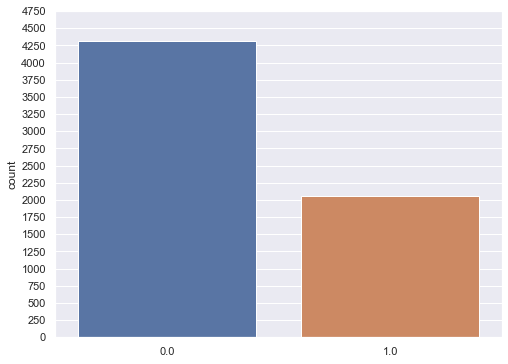

In [174]:
plt.figure(figsize=(8,6))
sns.set_style("darkgrid")
sns.countplot(np.ravel(y))
plt.yticks(range(0,5000,250))
plt.show()

In [182]:
rdm = RandomOverSampler()
X, y = rdm.fit_resample(X,y)
df = pd.concat([X,y],axis=1)  #updating the balanced form of dataset
print(df[df["affairs"]==0].shape)
print(df[df["affairs"]==1].shape)
print(df.shape)
print(df.isna().sum())

(4313, 18)
(4313, 18)
(8626, 18)
Intercept        0
occ_1            0
occ_2            0
occ_3            0
occ_4            0
occ_5            0
occ_husb_2       0
occ_husb_3       0
occ_husb_4       0
occ_husb_5       0
occ_husb_6       0
rate_marriage    0
age              0
yrs_married      0
children         0
religious        0
educ             0
affairs          0
dtype: int64


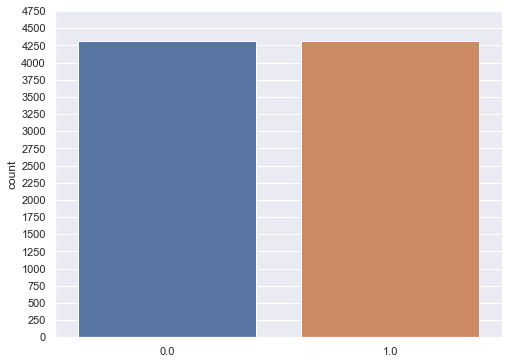

In [183]:
plt.figure(figsize=(8,6))
sns.set_style("darkgrid")
sns.countplot(np.ravel(y)) # converting y into array form to plot
plt.yticks(range(0,5000,250)) 
plt.show()

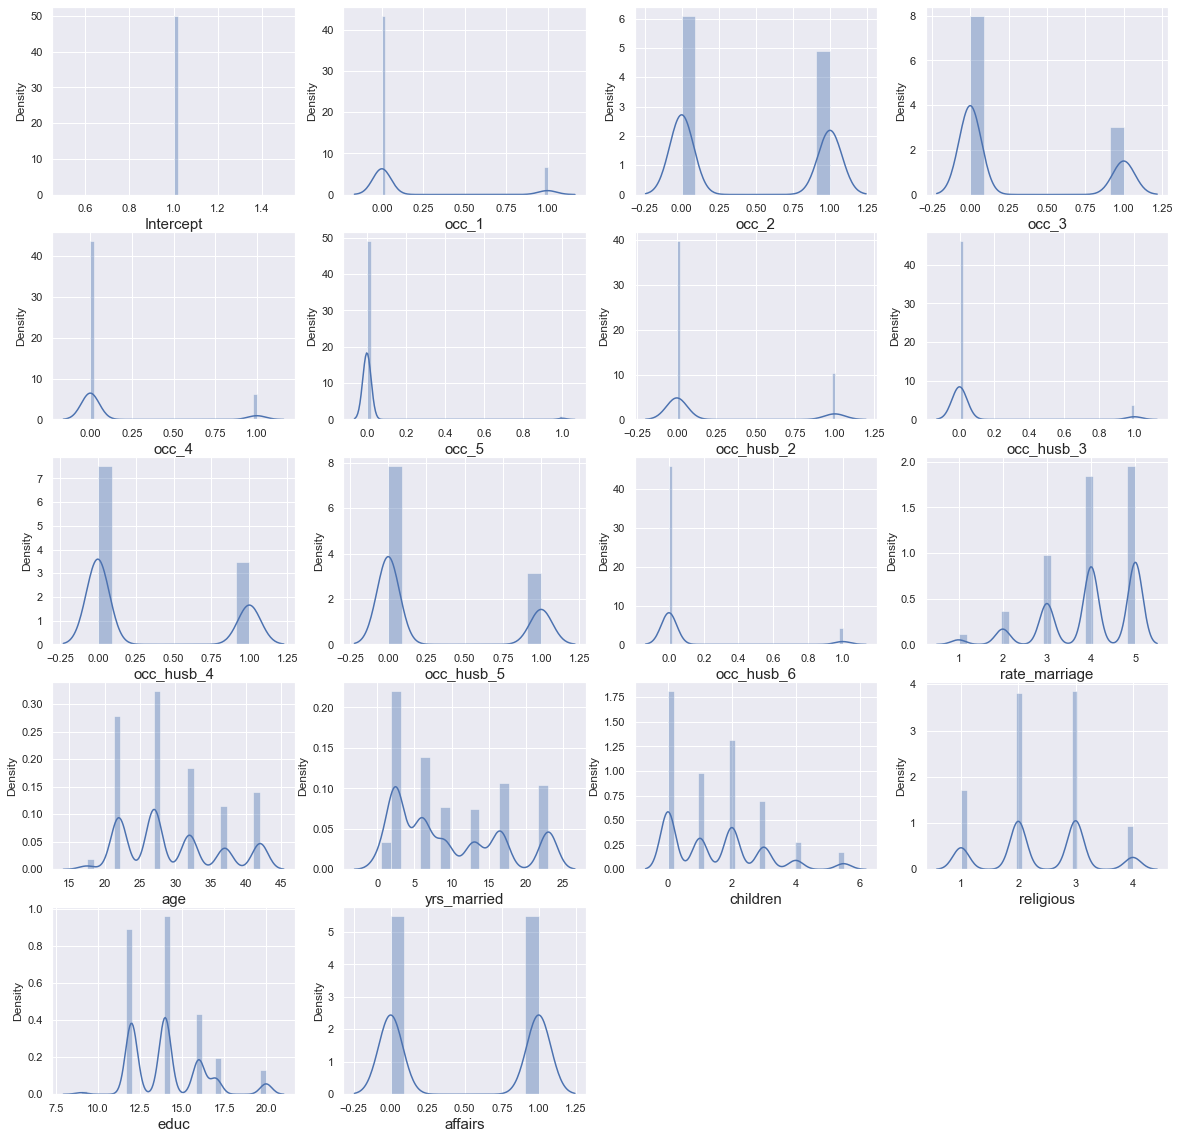

In [184]:
# seems like there is no null values in data
# check how data is distributed
plt.figure(figsize=(20,20), facecolor='white')
pltnum= 1
for column in df:
    if pltnum <= 20:
        ax = plt.subplot(5, 4, pltnum)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize=15)
    pltnum +=1
plt.show()

<AxesSubplot:>

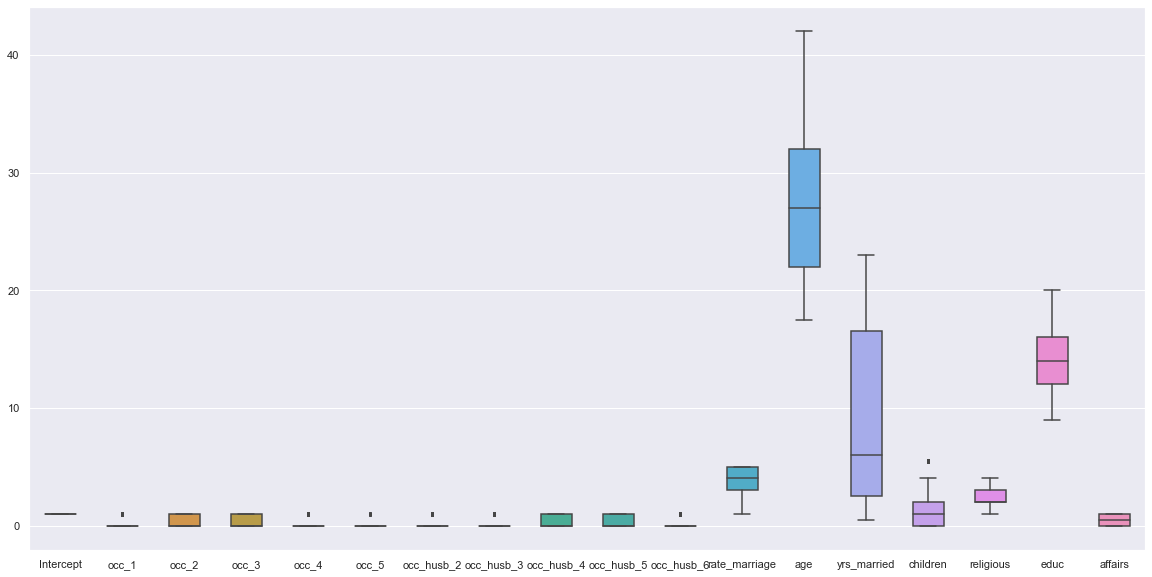

In [185]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.boxplot(data=df, width=0.5, fliersize=2, ax=ax)

In [186]:
# Visualising the data
vis_X = df.drop(columns=['Intercept', 'occ_1', 'occ_2', 'occ_3', 'occ_4', 'occ_5', 'occ_husb_2', 'occ_husb_3', 'occ_husb_4', 'occ_husb_5', 'occ_husb_6'])
vis_X

,rate_marriage,age,yrs_married,children,religious,educ,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,1.0
1,3.0,27.0,13.0,3.0,1.0,14.0,1.0
2,4.0,22.0,2.5,0.0,1.0,16.0,1.0
3,4.0,37.0,16.5,4.0,3.0,16.0,1.0
4,5.0,27.0,9.0,1.0,1.0,14.0,1.0
...,...,...,...,...,...,...,...
8621,3.0,27.0,6.0,0.0,1.0,16.0,1.0
8622,4.0,37.0,16.5,3.0,3.0,12.0,1.0
8623,2.0,27.0,6.0,2.0,2.0,12.0,1.0
8624,3.0,27.0,2.5,1.0,4.0,17.0,1.0


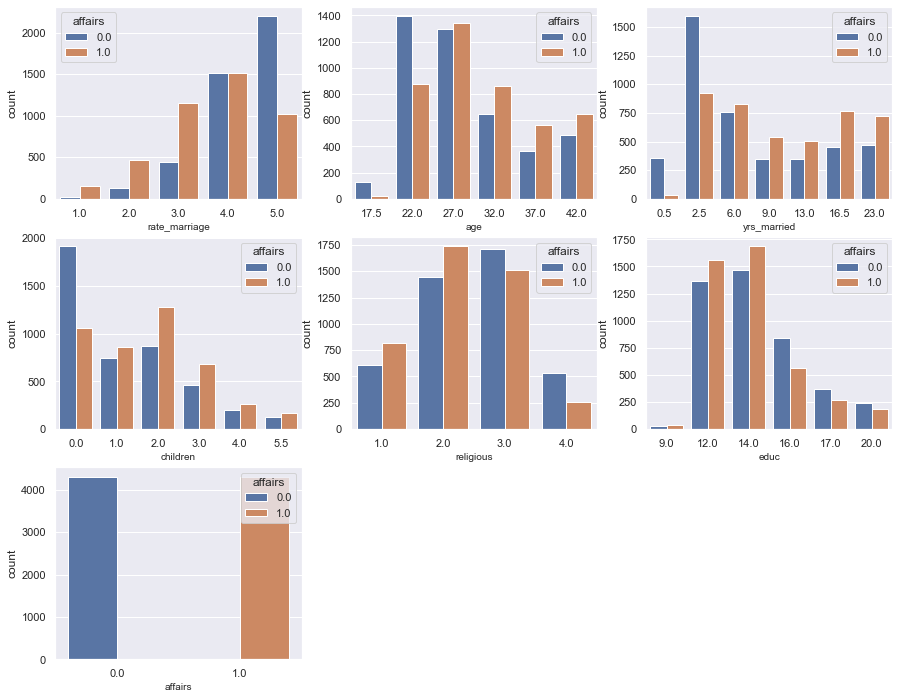

In [187]:
plt.figure(figsize=(15,12), facecolor='white')
n = 1
for column in vis_X:
    if n <= 9:
        ax = plt.subplot(3, 3, n)
        sns.countplot(vis_X[column], data=vis_X, hue="affairs")
        plt.xlabel(column, fontsize=10)
    n += 1
plt.show()

In [188]:
X2 = df.drop(columns=['Intercept', 'occ_1', 'occ_2', 'occ_3', 'occ_4', 'occ_5', 'occ_husb_2', 'occ_husb_3', 'occ_husb_4', 'occ_husb_5', 'occ_husb_6', 'affairs'])
y2 = df['affairs']

scalar = StandardScaler()
X_scaled = scalar.fit_transform(X2)

In [189]:
X2

,rate_marriage,age,yrs_married,children,religious,educ
0,3.0,32.0,9.0,3.0,3.0,17.0
1,3.0,27.0,13.0,3.0,1.0,14.0
2,4.0,22.0,2.5,0.0,1.0,16.0
3,4.0,37.0,16.5,4.0,3.0,16.0
4,5.0,27.0,9.0,1.0,1.0,14.0
...,...,...,...,...,...,...
8621,3.0,27.0,6.0,0.0,1.0,16.0
8622,4.0,37.0,16.5,3.0,3.0,12.0
8623,2.0,27.0,6.0,2.0,2.0,12.0
8624,3.0,27.0,2.5,1.0,4.0,17.0


In [191]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
vif['Features'] = X2.columns
vif

,VIF,Features
0,1.033785,rate_marriage
1,5.509080,age
2,7.093243,yrs_married
3,2.384105,children
4,1.035883,religious
5,1.109630,educ


In [192]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y2, test_size=0.25, random_state=355)

In [193]:
logR = LogisticRegression()
logR.fit(x_train, y_train)

LogisticRegression()

In [194]:
y_pred = logR.predict(x_test)

In [195]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.6852109411219286

In [196]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[747, 324],
       [355, 731]], dtype=int64)

In [197]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]
print(f"TP: {true_positive}, FP: {false_positive}\nFN: {false_negative}, TN: {true_negative}")

TP: 747, FP: 324
FN: 355, TN: 731


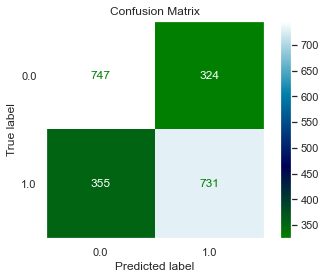

In [198]:
plot_confusion_matrix(logR, x_test, y_test, cmap='ocean')
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

In [199]:
acc_score = (true_positive + true_negative) / (true_positive + true_negative + false_positive + false_negative)
acc_score

0.6852109411219286

In [200]:
Precision = true_positive / (true_positive + false_positive)
Precision

0.6974789915966386

In [201]:
Recall = true_positive / (true_positive + false_negative)
Recall

0.677858439201452

In [202]:
F1_score = 2 * (Recall * Precision) / (Recall + Precision)
F1_score

0.6875287620800736

In [210]:
Specificity = true_negative / (true_negative + false_positive)
Specificity

0.6928909952606636

In [203]:
auc = roc_auc_score(y_test, y_pred)
auc

0.6852956652274168

In [204]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

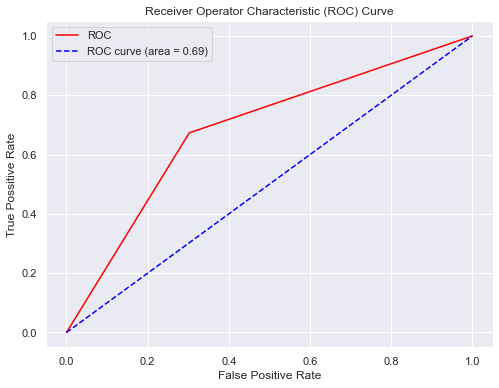

In [205]:
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color="red", label="ROC")
plt.plot([0, 1], [ 0, 1], color='blue', linestyle="--", label="ROC curve (area = %0.2f)" %auc)
plt.xlabel("False Positive Rate")
plt.ylabel("True Possitive Rate")
plt.title("Receiver Operator Characteristic (ROC) Curve")
plt.legend()
plt.show()

In [208]:
logR.predict(scalar.fit_transform([[3.0, 32.0, 9.0, 3.0, 3.0, 17.0]]))

array([1.])